In [1]:
import numpy as np
import pandas as pd
import re

In [2]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('gurgaon_properties_cleaned_v1.csv')

In [4]:
df.duplicated().sum()

122

In [5]:
df.head(1)
# focus is on -> areaWithType, additionalRoom, agePossession, furnishDetails, features 

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features
0,house,independent,sector 3,0.8,8155.0,981.0,Plot area 109(91.14 sq.m.),5,4,1,not available,2.0,NaN,5 to 10 Year Old,"['Hanuman Mandir', 'Sharma Hospital Gurgaon', 'Rajiv Memorial Eye Infirmary Jacobpura', 'Dr. Ajay S. Gupta Clinic', 'Aarvy Hospital', 'Rama Hospital & Nursing Home', 'Pasricha Hospital and Maternity Home', 'Gupta Hospital Gurgaon', 'Thakral Nursing and Maternity Home', 'Dr. Sandeep Chauhan', 'Nangia Hospital Ent and Maternity', 'Ahooja Eye and Dental Institute Hospital', 'Shubham Hospital Gurgaon', 'Triveni Hospital Gurgaon', 'Verma E.N.T. Hospital', 'Nova Care Clinic', 'Sethi Hospital Gurgaon', 'My Care Clinic', 'Tirath Ram Hospitals Pvt Ltd', 'M.S Hospital', 'Bindal Clinic', 'Vinayak Hospital Gurgaon', 'Dental Health Centre', 'Lall Eye Care Centre', 'Om Charitable Dental & Implant Centre', 'Lall Nursing and Maternity Home', 'Swastik Maternity and Medical Centre', 'Kharbanda Maternity and Nursing Home', 'Dentecare - Multispeciality Dental Clinic', 'Satyam Hospital Gurgaon', 'Parashar Hospital', 'Lalit Dental Care', 'M Goel Hospital', 'Kathuria Hospital', 'Chiranjiv Hospital', 'Kidney Clinic', 'Centre For Sight Gurgaon New Railway Road', 'Lal Superspeciality Hospital', 'Dev Man Kathuria Clinic', 'Shri Gobind Hospital', 'Dr. Sarvejeet Singh', 'Ravi Clinic and Health Care Centre', 'Jackson Hospital', 'Dr. Madan Clinic', 'IBP Petrol Station', 'Indian Oil', 'Punjab national bank', 'govt sec school', 'Dronacharya Government College', 'District library gurgaon']",NaN,NaN


In [6]:
#1. areaWithType >> requires the feature engineering
df.sample(5)[['price','area','areaWithType']]

,price,area,areaWithType
514,1.65,2215.0,Super Built up area 2215(205.78 sq.m.)Built Up area: 1900 sq.ft. (176.52 sq.m.)Carpet area: 1700 sq.ft. (157.94 sq.m.)
2658,1.25,1220.0,Super Built up area 1220(113.34 sq.m.)Carpet area: 694 sq.ft. (64.47 sq.m.)
2023,0.37,360.0,Plot area 360(33.45 sq.m.)
1297,2.30,2812.0,Super Built up area 2812(261.24 sq.m.)
835,2.50,1400.0,Plot area 1400(130.06 sq.m.)Built Up area: 1850 sq.ft. (171.87 sq.m.)


In [7]:
# This function extracts the Super Built up area
def get_super_built_up_area(text):
    match = re.search(r'Super Built up area (\d+\.?\d*)', text)
    if match:
        return float(match.group(1))
    return None

In [8]:
# This function extracts the Built Up area or Carpet area
def get_area(text, area_type):
    match = re.search(area_type + r'\s*:\s*(\d+\.?\d*)', text)
    if match:
        return float(match.group(1))
    return None

In [9]:
# This function checks if the area is provided in sq.m. and converts it to sqft if needed
def convert_to_sqft(text, area_value):
    if area_value is None:
        return None
    match = re.search(r'{} \((\d+\.?\d*) sq.m.\)'.format(area_value), text)
    if match:
        sq_m_value = float(match.group(1))
        return sq_m_value * 10.7639  # conversion factor from sq.m. to sqft
    return area_value

In [10]:
# Extract Super Built up area and convert to sqft if needed
df['super_built_up_area'] = df['areaWithType'].apply(get_super_built_up_area)
df['super_built_up_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['super_built_up_area']), axis=1)

# Extract Built Up area and convert to sqft if needed
df['built_up_area'] = df['areaWithType'].apply(lambda x: get_area(x, 'Built Up area'))
df['built_up_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['built_up_area']), axis=1)

# Extract Carpet area and convert to sqft if needed
df['carpet_area'] = df['areaWithType'].apply(lambda x: get_area(x, 'Carpet area'))
df['carpet_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['carpet_area']), axis=1)

In [11]:
df[['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].sample(5)

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
1657,2.37,flat,2061.0,Built Up area: 2060 (191.38 sq.m.)Carpet area: 1600 sq.ft. (148.64 sq.m.),NaN,2060.0,1600.0
1576,3.00,flat,2100.0,Super Built up area 2691(250 sq.m.)Built Up area: 2460 sq.ft. (228.54 sq.m.)Carpet area: 2100 sq.ft. (195.1 sq.m.),2691.0,2460.0,2100.0
837,1.40,flat,1581.0,Super Built up area 1578(146.6 sq.m.),1578.0,NaN,NaN
3208,NaN,house,NaN,Plot area 520(434.79 sq.m.),NaN,NaN,NaN
2264,0.95,flat,1875.0,Super Built up area 1875(174.19 sq.m.),1875.0,NaN,NaN


In [12]:
df.duplicated().sum()

122

In [13]:
df[~((df['super_built_up_area'].isnull()) | (df['built_up_area'].isnull()) | (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].shape

(534, 7)

In [14]:
df[df['areaWithType'].str.contains('Plot')][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].head(5)

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
0,0.80,house,981.0,Plot area 109(91.14 sq.m.),NaN,NaN,NaN
9,10.55,house,3240.0,Plot area 360(301.01 sq.m.),NaN,NaN,NaN
12,12.00,house,2844.0,Plot area 316(264.22 sq.m.),NaN,NaN,NaN
21,10.50,house,3618.0,Plot area 402(336.12 sq.m.),NaN,NaN,NaN
24,7.80,house,3370.0,Plot area 360(301.01 sq.m.),NaN,NaN,NaN


In [15]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                    18
price_per_sqft           18
area                     18
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
additionalRoom            0
floorNum                 19
facing                 1105
agePossession             1
nearbyLocations         177
furnishDetails          981
features                635
super_built_up_area    1888
built_up_area          2616
carpet_area            1859
dtype: int64

In [16]:
all_nan_df = df[((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']]

In [17]:
all_nan_df.head()

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
0,0.80,house,981.0,Plot area 109(91.14 sq.m.),NaN,NaN,NaN
9,10.55,house,3240.0,Plot area 360(301.01 sq.m.),NaN,NaN,NaN
12,12.00,house,2844.0,Plot area 316(264.22 sq.m.),NaN,NaN,NaN
21,10.50,house,3618.0,Plot area 402(336.12 sq.m.),NaN,NaN,NaN
24,7.80,house,3370.0,Plot area 360(301.01 sq.m.),NaN,NaN,NaN


In [18]:
all_nan_index = df[((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].index

In [19]:
# Function to extract plot area from 'areaWithType' column
def extract_plot_area(area_with_type):
    match = re.search(r'Plot area (\d+\.?\d*)', area_with_type)
    return float(match.group(1)) if match else None

In [20]:
all_nan_df['built_up_area'] = all_nan_df['areaWithType'].apply(extract_plot_area)

# Update the original dataframe
#gurgaon_properties.update(filtered_rows)

In [21]:
all_nan_df

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
0,0.80,house,981.0,Plot area 109(91.14 sq.m.),NaN,109.00,NaN
9,10.55,house,3240.0,Plot area 360(301.01 sq.m.),NaN,360.00,NaN
12,12.00,house,2844.0,Plot area 316(264.22 sq.m.),NaN,316.00,NaN
21,10.50,house,3618.0,Plot area 402(336.12 sq.m.),NaN,402.00,NaN
24,7.80,house,3370.0,Plot area 360(301.01 sq.m.),NaN,360.00,NaN
25,1.10,house,200.0,Plot area 200(18.58 sq.m.),NaN,200.00,NaN
28,6.50,house,2844.0,Plot area 316(264.22 sq.m.),NaN,316.00,NaN
39,1.44,house,540.0,Plot area 60(50.17 sq.m.),NaN,60.00,NaN
48,4.50,house,1350.0,Plot area 150(125.42 sq.m.),NaN,150.00,NaN
57,0.40,house,450.0,Plot area 50(41.81 sq.m.),NaN,50.00,NaN


In [22]:
def convert_scale(row):
    if np.isnan(row['area']) or np.isnan(row['built_up_area']):
        return row['built_up_area']
    else:
        if round(row['area']/row['built_up_area']) == 9.0:
            return row['built_up_area'] * 9
        elif round(row['area']/row['built_up_area']) == 11.0:
            return row['built_up_area'] * 10.7
        else:
            return row['built_up_area']

In [23]:
all_nan_df['built_up_area'] = all_nan_df.apply(convert_scale,axis=1)

In [24]:
all_nan_df

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
0,0.80,house,981.0,Plot area 109(91.14 sq.m.),NaN,981.00,NaN
9,10.55,house,3240.0,Plot area 360(301.01 sq.m.),NaN,3240.00,NaN
12,12.00,house,2844.0,Plot area 316(264.22 sq.m.),NaN,2844.00,NaN
21,10.50,house,3618.0,Plot area 402(336.12 sq.m.),NaN,3618.00,NaN
24,7.80,house,3370.0,Plot area 360(301.01 sq.m.),NaN,3240.00,NaN
25,1.10,house,200.0,Plot area 200(18.58 sq.m.),NaN,200.00,NaN
28,6.50,house,2844.0,Plot area 316(264.22 sq.m.),NaN,2844.00,NaN
39,1.44,house,540.0,Plot area 60(50.17 sq.m.),NaN,540.00,NaN
48,4.50,house,1350.0,Plot area 150(125.42 sq.m.),NaN,1350.00,NaN
57,0.40,house,450.0,Plot area 50(41.81 sq.m.),NaN,450.00,NaN


In [25]:
# update the original dataframe
df.update(all_nan_df)

In [26]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                    18
price_per_sqft           18
area                     18
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
additionalRoom            0
floorNum                 19
facing                 1105
agePossession             1
nearbyLocations         177
furnishDetails          981
features                635
super_built_up_area    1888
built_up_area          2070
carpet_area            1859
dtype: int64

In [27]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area
0,house,independent,sector 3,0.80,8155.0,981.0,Plot area 109(91.14 sq.m.),5,4,1,not available,2.0,NaN,5 to 10 Year Old,"['Hanuman Mandir', 'Sharma Hospital Gurgaon', 'Rajiv Memorial Eye Infirmary Jacobpura', 'Dr. Ajay S. Gupta Clinic', 'Aarvy Hospital', 'Rama Hospital & Nursing Home', 'Pasricha Hospital and Maternity Home', 'Gupta Hospital Gurgaon', 'Thakral Nursing and Maternity Home', 'Dr. Sandeep Chauhan', 'Nangia Hospital Ent and Maternity', 'Ahooja Eye and Dental Institute Hospital', 'Shubham Hospital Gurgaon', 'Triveni Hospital Gurgaon', 'Verma E.N.T. Hospital', 'Nova Care Clinic', 'Sethi Hospital Gurgaon', 'My Care Clinic', 'Tirath Ram Hospitals Pvt Ltd', 'M.S Hospital', 'Bindal Clinic', 'Vinayak Hospital Gurgaon', 'Dental Health Centre', 'Lall Eye Care Centre', 'Om Charitable Dental & Implant Centre', 'Lall Nursing and Maternity Home', 'Swastik Maternity and Medical Centre', 'Kharbanda Maternity and Nursing Home', 'Dentecare - Multispeciality Dental Clinic', 'Satyam Hospital Gurgaon', 'Parashar Hospital', 'Lalit Dental Care', 'M Goel Hospital', 'Kathuria Hospital', 'Chiranjiv Hospital', 'Kidney Clinic', 'Centre For Sight Gurgaon New Railway Road', 'Lal Superspeciality Hospital', 'Dev Man Kathuria Clinic', 'Shri Gobind Hospital', 'Dr. Sarvejeet Singh', 'Ravi Clinic and Health Care Centre', 'Jackson Hospital', 'Dr. Madan Clinic', 'IBP Petrol Station', 'Indian Oil', 'Punjab national bank', 'govt sec school', 'Dronacharya Government College', 'District library gurgaon']",NaN,NaN,NaN,981.0,NaN
1,flat,valley view estate,gwal pahari,1.50,8278.0,1812.0,Carpet area: 1812 (168.34 sq.m.),4,4,3+,"study room,servant room,others",9.0,North,10+ Year Old,"['HANUMAN MANDIR', 'SHIV MANDIR BALIYAWAS', 'Indusind bank ATM', 'Parivar Clinic', 'Janki Max Hospital', 'Arunodaya Deseret Eye Hospital', 'Apollo Pharmacy', 'Intellion Park', 'International Tech Park', 'CHINESE CORNER', 'GOVERNMENT SCHOOL', 'Regional Skill Development Centre', 'Suncity School', 'Ansal Institute of Technology', 'Sushant College of Arts & Architecture']","['7 Fan', '1 Exhaust Fan', '20 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Piped-gas', 'Visitor Parking', 'Park', 'Security Personnel', 'Natural Light', 'Internet/wi-fi connectivity', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Shopping Centre', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center']",NaN,NaN,1812.0
2,flat,godrej oasis,sector 88a,1.00,6896.0,1450.0,Carpet area: 1450 (134.71 sq.m.),2,2,3,study room,7.0,NaN,1 to 5 Year Old,"['Double Infinity market', 'Pataudi road', 'Dwarka expressway', 'Kidzee', 'RPS International School', 'Aman Hospital', 'Bamroli Cricket Ground']",NaN,"['Security / Fire Alarm', 'Power Back-up', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Swimming Pool', 'Park', 'Shopping Centre', 'Fitness Centre / GYM', 'Rain Water Harvesting', 'Club house / Community Center']",NaN,NaN,1450.0
3,flat,puri diplomatic greens,sector 111,3.50,11864.0,2950.0,Super Built up area 2950(274.06 sq.m.)Built Up area: 2700 sq.ft. (250.84 sq.m.)Carpet area: 2500 sq.ft. (232.26 sq.m.),4,5,3+,servant room,10.0,North-East,1 to 5 Year Old,"['Dwarka Sector 21 Metro Station', 'Gurgaon Dreamz Mall', 'Dwarka Expressway', 'Delhi', 'Delhi Jaipur Highway', 'Red Roses Public School', 'The NorthC

In [ ]:
# 2nd additional Room column also require the feature engineering

In [28]:
df['additionalRoom'].value_counts()

additionalRoom
not available                                    1587
servant room                                      705
study room                                        250
others                                            225
pooja room                                        165
store room                                         99
study room,servant room                            99
pooja room,servant room                            82
pooja room,study room,servant room,store room      72
servant room,others                                60
pooja room,study room,servant room                 55
pooja room,study room,servant room,others          54
servant room,pooja room                            38
servant room,store room                            33
study room,others                                  29
pooja room,study room                              22
pooja room,others                                  17
pooja room,store room                              15
pooja room,st

In [29]:
# additional room
# List of new columns to be created
new_cols = ['study room', 'servant room', 'store room', 'pooja room', 'others']

# Populate the new columns based on the "additionalRoom" column
for col in new_cols:
    df[col] = df['additionalRoom'].str.contains(col).astype(int)

In [30]:
pdf.sample(5)[['additionalRoom','study room', 'servant room', 'store room', 'pooja room', 'others']]

,additionalRoom,study room,servant room,store room,pooja room,others
2247,pooja room,0,0,0,1,0
2284,"servant room,store room",0,1,1,0,0
3469,not available,0,0,0,0,0
123,study room,1,0,0,0,0
1264,not available,0,0,0,0,0


In [32]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others
0,house,independent,sector 3,0.80,8155.0,981.0,Plot area 109(91.14 sq.m.),5,4,1,not available,2.0,NaN,5 to 10 Year Old,"['Hanuman Mandir', 'Sharma Hospital Gurgaon', 'Rajiv Memorial Eye Infirmary Jacobpura', 'Dr. Ajay S. Gupta Clinic', 'Aarvy Hospital', 'Rama Hospital & Nursing Home', 'Pasricha Hospital and Maternity Home', 'Gupta Hospital Gurgaon', 'Thakral Nursing and Maternity Home', 'Dr. Sandeep Chauhan', 'Nangia Hospital Ent and Maternity', 'Ahooja Eye and Dental Institute Hospital', 'Shubham Hospital Gurgaon', 'Triveni Hospital Gurgaon', 'Verma E.N.T. Hospital', 'Nova Care Clinic', 'Sethi Hospital Gurgaon', 'My Care Clinic', 'Tirath Ram Hospitals Pvt Ltd', 'M.S Hospital', 'Bindal Clinic', 'Vinayak Hospital Gurgaon', 'Dental Health Centre', 'Lall Eye Care Centre', 'Om Charitable Dental & Implant Centre', 'Lall Nursing and Maternity Home', 'Swastik Maternity and Medical Centre', 'Kharbanda Maternity and Nursing Home', 'Dentecare - Multispeciality Dental Clinic', 'Satyam Hospital Gurgaon', 'Parashar Hospital', 'Lalit Dental Care', 'M Goel Hospital', 'Kathuria Hospital', 'Chiranjiv Hospital', 'Kidney Clinic', 'Centre For Sight Gurgaon New Railway Road', 'Lal Superspeciality Hospital', 'Dev Man Kathuria Clinic', 'Shri Gobind Hospital', 'Dr. Sarvejeet Singh', 'Ravi Clinic and Health Care Centre', 'Jackson Hospital', 'Dr. Madan Clinic', 'IBP Petrol Station', 'Indian Oil', 'Punjab national bank', 'govt sec school', 'Dronacharya Government College', 'District library gurgaon']",NaN,NaN,NaN,981.0,NaN,0,0,0,0,0
1,flat,valley view estate,gwal pahari,1.50,8278.0,1812.0,Carpet area: 1812 (168.34 sq.m.),4,4,3+,"study room,servant room,others",9.0,North,10+ Year Old,"['HANUMAN MANDIR', 'SHIV MANDIR BALIYAWAS', 'Indusind bank ATM', 'Parivar Clinic', 'Janki Max Hospital', 'Arunodaya Deseret Eye Hospital', 'Apollo Pharmacy', 'Intellion Park', 'International Tech Park', 'CHINESE CORNER', 'GOVERNMENT SCHOOL', 'Regional Skill Development Centre', 'Suncity School', 'Ansal Institute of Technology', 'Sushant College of Arts & Architecture']","['7 Fan', '1 Exhaust Fan', '20 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Piped-gas', 'Visitor Parking', 'Park', 'Security Personnel', 'Natural Light', 'Internet/wi-fi connectivity', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Shopping Centre', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center']",NaN,NaN,1812.0,1,1,0,0,1
2,flat,godrej oasis,sector 88a,1.00,6896.0,1450.0,Carpet area: 1450 (134.71 sq.m.),2,2,3,study room,7.0,NaN,1 to 5 Year Old,"['Double Infinity market', 'Pataudi road', 'Dwarka expressway', 'Kidzee', 'RPS International School', 'Aman Hospital', 'Bamroli Cricket Ground']",NaN,"['Security / Fire Alarm', 'Power Back-up', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Swimming Pool', 'Park', 'Shopping Centre', 'Fitness Centre / GYM', 'Rain Water Harvesting', 'Club house / Community Center']",NaN,NaN,1450.0,1,0,0,0,0
3,flat,puri diplomatic greens,sector 111,3.50,11864.0,2950.0,Super Built up area 2950(274.06 sq.m.)Built Up area: 2700 sq.ft. (250.84 sq.m.)Carpet area: 2500 sq.ft. (232.26 sq.m.),4,5,3+,servant room,10.0,North-East,1 to 5 Year Old,"['Dwarka Sector 21 Metro Station', 'Gurgaon Dreamz Mall', 'Dwarka E

In [ ]:
# 3rd column is agePossession which also requires the feature engineering

In [33]:
df['agePossession'].value_counts()

agePossession
1 to 5 Year Old       1676
5 to 10 Year Old       575
0 to 1 Year Old        530
undefined              332
10+ Year Old           310
Under Construction      90
Within 6 months         70
Within 3 months         26
Dec 2023                22
By 2023                 19
By 2024                 17
Dec 2024                16
Mar 2024                14
Oct 2024                 8
Jan 2024                 8
Aug 2023                 7
Jun 2024                 7
Dec 2025                 7
Nov 2023                 5
Jul 2024                 4
Oct 2023                 4
Sep 2023                 4
By 2025                  4
Aug 2024                 4
Nov 2024                 3
Jan 2025                 3
Feb 2024                 3
May 2024                 3
Jul 2027                 2
Oct 2025                 2
Aug 2025                 2
Jul 2025                 2
Apr 2026                 2
Mar 2025                 2
Jan 2026                 2
Jun 2027                 2
Dec 2026      

In [34]:
def categorize_age_possession(value):
    if pd.isna(value):
        return "Undefined"
    if "0 to 1 Year Old" in value or "Within 6 months" in value or "Within 3 months" in value:
        return "New Property"
    if "1 to 5 Year Old" in value:
        return "Relatively New"
    if "5 to 10 Year Old" in value:
        return "Moderately Old"
    if "10+ Year Old" in value:
        return "Old Property"
    if "Under Construction" in value or "By" in value:
        return "Under Construction"
    try:
        # For entries like 'May 2024'
        int(value.split(" ")[-1])
        return "Under Construction"
    except:
        return "Undefined"

In [35]:
df['agePossession'] = df['agePossession'].apply(categorize_age_possession)

In [36]:
df['agePossession'].value_counts()

agePossession
Relatively New        1676
New Property           626
Moderately Old         575
Undefined              333
Old Property           310
Under Construction     283
Name: count, dtype: int64

In [37]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others
0,house,independent,sector 3,0.80,8155.0,981.0,Plot area 109(91.14 sq.m.),5,4,1,not available,2.0,NaN,Moderately Old,"['Hanuman Mandir', 'Sharma Hospital Gurgaon', 'Rajiv Memorial Eye Infirmary Jacobpura', 'Dr. Ajay S. Gupta Clinic', 'Aarvy Hospital', 'Rama Hospital & Nursing Home', 'Pasricha Hospital and Maternity Home', 'Gupta Hospital Gurgaon', 'Thakral Nursing and Maternity Home', 'Dr. Sandeep Chauhan', 'Nangia Hospital Ent and Maternity', 'Ahooja Eye and Dental Institute Hospital', 'Shubham Hospital Gurgaon', 'Triveni Hospital Gurgaon', 'Verma E.N.T. Hospital', 'Nova Care Clinic', 'Sethi Hospital Gurgaon', 'My Care Clinic', 'Tirath Ram Hospitals Pvt Ltd', 'M.S Hospital', 'Bindal Clinic', 'Vinayak Hospital Gurgaon', 'Dental Health Centre', 'Lall Eye Care Centre', 'Om Charitable Dental & Implant Centre', 'Lall Nursing and Maternity Home', 'Swastik Maternity and Medical Centre', 'Kharbanda Maternity and Nursing Home', 'Dentecare - Multispeciality Dental Clinic', 'Satyam Hospital Gurgaon', 'Parashar Hospital', 'Lalit Dental Care', 'M Goel Hospital', 'Kathuria Hospital', 'Chiranjiv Hospital', 'Kidney Clinic', 'Centre For Sight Gurgaon New Railway Road', 'Lal Superspeciality Hospital', 'Dev Man Kathuria Clinic', 'Shri Gobind Hospital', 'Dr. Sarvejeet Singh', 'Ravi Clinic and Health Care Centre', 'Jackson Hospital', 'Dr. Madan Clinic', 'IBP Petrol Station', 'Indian Oil', 'Punjab national bank', 'govt sec school', 'Dronacharya Government College', 'District library gurgaon']",NaN,NaN,NaN,981.0,NaN,0,0,0,0,0
1,flat,valley view estate,gwal pahari,1.50,8278.0,1812.0,Carpet area: 1812 (168.34 sq.m.),4,4,3+,"study room,servant room,others",9.0,North,Old Property,"['HANUMAN MANDIR', 'SHIV MANDIR BALIYAWAS', 'Indusind bank ATM', 'Parivar Clinic', 'Janki Max Hospital', 'Arunodaya Deseret Eye Hospital', 'Apollo Pharmacy', 'Intellion Park', 'International Tech Park', 'CHINESE CORNER', 'GOVERNMENT SCHOOL', 'Regional Skill Development Centre', 'Suncity School', 'Ansal Institute of Technology', 'Sushant College of Arts & Architecture']","['7 Fan', '1 Exhaust Fan', '20 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Piped-gas', 'Visitor Parking', 'Park', 'Security Personnel', 'Natural Light', 'Internet/wi-fi connectivity', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Shopping Centre', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center']",NaN,NaN,1812.0,1,1,0,0,1
2,flat,godrej oasis,sector 88a,1.00,6896.0,1450.0,Carpet area: 1450 (134.71 sq.m.),2,2,3,study room,7.0,NaN,Relatively New,"['Double Infinity market', 'Pataudi road', 'Dwarka expressway', 'Kidzee', 'RPS International School', 'Aman Hospital', 'Bamroli Cricket Ground']",NaN,"['Security / Fire Alarm', 'Power Back-up', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Swimming Pool', 'Park', 'Shopping Centre', 'Fitness Centre / GYM', 'Rain Water Harvesting', 'Club house / Community Center']",NaN,NaN,1450.0,1,0,0,0,0
3,flat,puri diplomatic greens,sector 111,3.50,11864.0,2950.0,Super Built up area 2950(274.06 sq.m.)Built Up area: 2700 sq.ft. (250.84 sq.m.)Carpet area: 2500 sq.ft. (232.26 sq.m.),4,5,3+,servant room,10.0,North-East,Relatively New,"['Dwarka Sector 21 Metro Station', 'Gurgaon Dreamz Mall', 'Dwarka Expre

In [ ]:
# 4rht column is furnishDetails these column also require the feature engineering

In [38]:
df.sample(5)[['furnishDetails','features']]

,furnishDetails,features
496,"['1 Water Purifier', '1 Exhaust Fan', '6 Geyser', '1 Stove', '6 AC', '1 Modular Kitchen', '1 Chimney', 'No Bed', 'No Curtains', 'No Dining Table', 'No Fan', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No TV', 'No Wardrobe', 'No Washing Machine']","['Centrally Air Conditioned', 'Water purifier', 'Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Bank Attached Property', 'Piped-gas', 'Internet/wi-fi connectivity', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']"
3534,"['2 Wardrobe', '3 Fan', '1 Exhaust Fan', '1 Geyser', '5 Light', '1 Modular Kitchen', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Security / Fire Alarm', 'Lift(s)', 'Water Storage', 'Park']"
904,NaN,"['Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'No open drainage around', 'Visitor Parking', 'Park', 'Security Personnel', 'Natural Light', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center']"
2104,"['1 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']",NaN
3013,NaN,"['Lift(s)', 'Maintenance Staff', 'Park', 'Fitness Centre / GYM', 'Rain Water Harvesting']"


In [39]:
# Extract all unique furnishings from the furnishDetails column
all_furnishings = []
for detail in df['furnishDetails'].dropna():
    furnishings = detail.replace('[', '').replace(']', '').replace("'", "").split(', ')
    all_furnishings.extend(furnishings)
unique_furnishings = list(set(all_furnishings))

# Define a function to extract the count of a furnishing from the furnishDetails
def get_furnishing_count(details, furnishing):
    if isinstance(details, str):
        if f"No {furnishing}" in details:
            return 0
        pattern = re.compile(f"(\d+) {furnishing}")
        match = pattern.search(details)
        if match:
            return int(match.group(1))
        elif furnishing in details:
            return 1
    return 0

# Simplify the furnishings list by removing "No" prefix and numbers
columns_to_include = [re.sub(r'No |\d+', '', furnishing).strip() for furnishing in unique_furnishings]
columns_to_include = list(set(columns_to_include))  # Get unique furnishings
columns_to_include = [furnishing for furnishing in columns_to_include if furnishing]  # Remove empty strings

# Create new columns for each unique furnishing and populate with counts
for furnishing in columns_to_include:
    df[furnishing] = df['furnishDetails'].apply(lambda x: get_furnishing_count(x, furnishing))

# Create the new dataframe with the required columns
furnishings_df = df[['furnishDetails'] + columns_to_include]


In [40]:
furnishings_df.shape

(3803, 19)

In [41]:
furnishings_df.drop(columns=['furnishDetails'],inplace=True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_8252\114705885.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  furnishings_df.drop(columns=['furnishDetails'],inplace=True)


In [42]:
furnishings_df.sample(5)

,Fan,Fridge,Bed,Microwave,Dining Table,AC,Exhaust Fan,TV,Water Purifier,Light,Curtains,Wardrobe,Sofa,Modular Kitchen,Chimney,Washing Machine,Stove,Geyser
3013,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2762,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2228,11,0,0,0,0,0,1,0,0,18,0,8,0,1,1,0,0,0
1900,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1636,6,0,0,0,0,6,1,0,1,10,1,4,0,1,0,0,0,4


In [43]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [44]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(furnishings_df)

In [45]:
wcss_reduced = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    wcss_reduced.append(kmeans.inertia_)

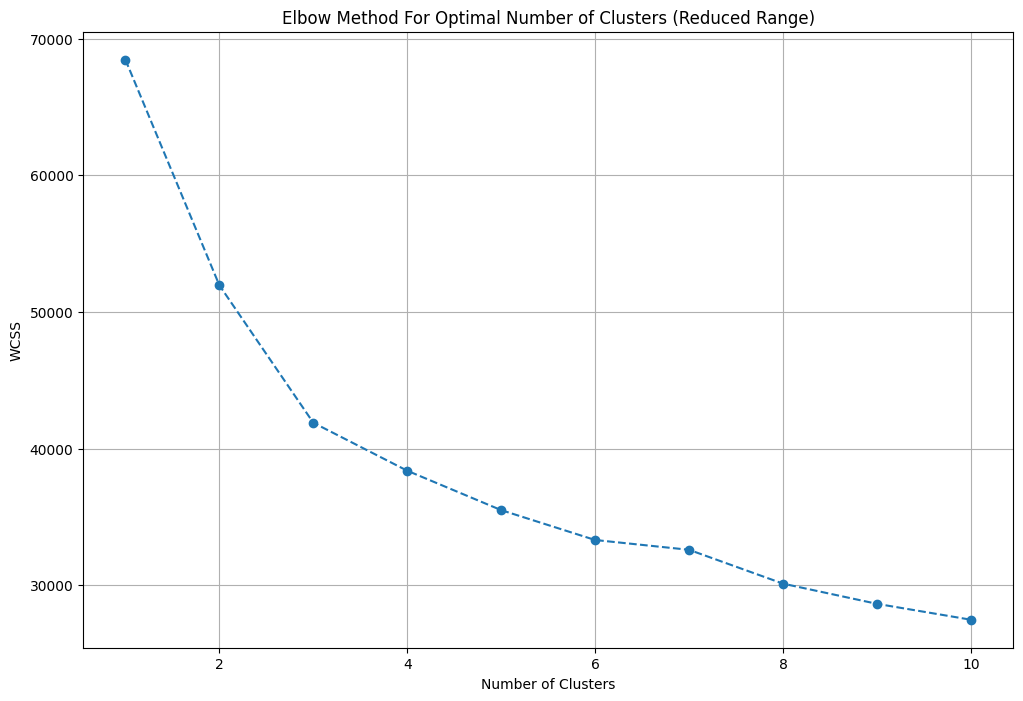

In [46]:
# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(range(1,11), wcss_reduced, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters (Reduced Range)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [47]:
n_clusters = 3

# Fit the KMeans model
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(scaled_data)

# Predict the cluster assignments for each row
cluster_assignments = kmeans.predict(scaled_data)

In [48]:
df = df.iloc[:,:-18]

In [49]:
df['furnishing_type'] = cluster_assignments

In [51]:
df.sample(5)[['furnishDetails','furnishing_type']]
# 0 -> unfurnished
# 1 -> semifurnished
# 2 -> furnished

,furnishDetails,furnishing_type
853,"['1 Exhaust Fan', '12 Geyser', '12 AC', '1 Modular Kitchen', '1 Chimney', 'No Bed', 'No Curtains', 'No Dining Table', 'No Fan', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']",1
1147,NaN,0
2921,NaN,0
2030,"['1 Water Purifier', '17 Fan', '1 Fridge', '1 Exhaust Fan', '13 Geyser', '52 Light', '12 AC', '1 Modular Kitchen', '13 TV', '16 Wardrobe', '1 Sofa', '1 Washing Machine', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Microwave', 'No Stove']",2
1132,NaN,0


In [ ]:
# 5th column is features column which required the feature engineering


In [52]:
df[['society','features']].sample(5)

,society,features
1155,unitech espace,"['Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Maintenance Staff', 'Water Storage', 'No open drainage around', 'Bank Attached Property', 'Piped-gas', 'Visitor Parking', 'Swimming Pool', 'Park', 'Natural Light', 'Airy Rooms', 'Low Density Society', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center']"
2883,tata primanti,"['Centrally Air Conditioned', 'High Ceiling Height', 'Separate entry for servant room', 'No open drainage around', 'Piped-gas', 'Swimming Pool', 'Security Personnel', 'Natural Light', 'Internet/wi-fi connectivity', 'Airy Rooms', 'Low Density Society', 'Shopping Centre', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center', 'Water softening plant']"
286,sector 14 rwa,NaN
3708,signature global solera 2,"['Power Back-up', 'Intercom Facility', 'Lift(s)', 'Park', 'Fitness Centre / GYM', 'Club house / Community Center']"
3621,m3m skywalk,"['Centrally Air Conditioned', 'Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'Water Storage', 'No open drainage around', 'Bank Attached Property', 'Piped-gas', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']"


In [53]:
df['features'].isnull().sum()

635

In [54]:
import pandas as pd
app_df = pd.read_csv('datasets/appartments.csv')
app_df.head(2)

,PropertyName,PropertySubName,NearbyLocations,LocationAdvantages,Link,PriceDetails,TopFacilities
0,Smartworld One DXP,"2, 3, 4 BHK Apartment in Sector 113, Gurgaon","['Bajghera Road', 'Palam Vihar Halt', 'DPSG Palam Vihar', 'Park Hospital', 'Gurgaon Railway Station']","{'Bajghera Road': '800 Meter', 'Palam Vihar Halt': '2.5 KM', 'DPSG Palam Vihar': '3.1 KM', 'Park Hospital': '3.1 KM', 'Gurgaon Railway Station': '4.9 KM', 'The NorthCap University': '5.4 KM', 'Dwarka Expy': '1.2 KM', 'Hyatt Place Gurgaon Udyog Vihar': '7.7 KM', 'Dwarka Sector 21, Metro Station': '7.2 KM', 'Pacific D21 Mall': '7.4 KM', 'Indira Gandhi International Airport': '14.7 KM', 'Hamoni Golf Camp': '6.2 KM', 'Fun N Food Waterpark': '8.8 KM', 'Accenture DDC5': '9 KM'}",https://www.99acres.com/smartworld-one-dxp-sector-113-gurgaon-npxid-r400415,"{'2 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '1,370 sq.ft.', 'price-range': '₹ 2 - 2.4 Cr'}, '3 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '1,850 - 2,050 sq.ft.', 'price-range': '₹ 2.25 - 3.59 Cr'}, '4 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '2,600 sq.ft.', 'price-range': '₹ 3.24 - 4.56 Cr'}}","['Swimming Pool', 'Salon', 'Restaurant', 'Spa', 'Cafeteria', 'Sun Deck', '24x7 Security', 'Club House', 'Gated Community']"
1,M3M Crown,"3, 4 BHK Apartment in Sector 111, Gurgaon","['DPSG Palam Vihar Gurugram', 'The NorthCap University', 'Park Hospital, Palam Vihar', 'Pacific D21 Mall', 'Palam Vihar Halt Railway Station']","{'DPSG Palam Vihar Gurugram': '1.4 Km', 'The NorthCap University': '4.4 Km', 'Park Hospital, Palam Vihar': '1.4 Km', 'Pacific D21 Mall': '8.2 Km', 'Palam Vihar Halt Railway Station': '1.2 Km', 'Dwarka Sector 21 Metro Station': '8.1 Km', 'Dwarka Expressway': '450 m', 'Fun N Food Water Park': '8.1 Km', 'Indira Gandhi International Airport': '14.1 Km', 'Tau DeviLal Sports Complex': '11.2 Km', 'Hamoni Golf Camp': '5 Km', 'Hyatt Place': '6.1 Km', 'Altrade Business Centre': '11.2 Km'}",https://www.99acres.com/m3m-crown-sector-111-gurgaon-npxid-r404068,"{'3 BHK': {'building_type': 'Apartment', 'area_type': 'Super Built-up Area', 'area': '1,605 - 2,170 sq.ft.', 'price-range': '₹ 2.2 - 3.03 Cr'}, '4 BHK': {'building_type': 'Apartment', 'area_type': 'Super Built-up Area', 'area': '2,248 - 2,670 sq.ft.', 'price-range': '₹ 3.08 - 3.73 Cr'}}","['Bowling Alley', 'Mini Theatre', 'Manicured Garden', 'Swimming Pool', 'Flower Garden', 'Reading Lounge', 'Golf Course', 'Barbecue', 'Sauna']"


In [55]:
app_df['PropertyName'] = app_df['PropertyName'].str.lower()

In [56]:
temp_df = df[df['features'].isnull()]

In [57]:
temp_df.shape

(635, 26)

In [59]:
x = temp_df.merge(app_df,left_on='society',right_on='PropertyName',how='left')['TopFacilities']

In [60]:
df.loc[temp_df.index,'features'] = x.values

In [61]:
df['features'].isnull().sum()

481

In [64]:
# Convert the string representation of lists in the 'features' column to actual lists
df['features_list'] = df['features'].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) and x.startswith('[') else [])

# Use MultiLabelBinarizer to convert the features list into a binary matrix
mlb = MultiLabelBinarizer()
features_binary_matrix = mlb.fit_transform(df['features_list'])

# Convert the binary matrix into a DataFrame
features_binary_df = pd.DataFrame(features_binary_matrix, columns=mlb.classes_)

In [65]:
features_binary_df.sample(5)

,24/7 Power Backup,24/7 Water Supply,24x7 Security,ATM,Aerobics Centre,Air Hockey,Airy Rooms,Amphitheatre,Automated Car Wash,Badminton Court,Bank Attached Property,Banquet Hall,Bar/Chill-Out Lounge,Barbecue,Basketball Court,Beach Volley Ball Court,Billiards,Bowling Alley,Bus Shelter,Business Lounge,CCTV Camera Security,Cafeteria,Car Parking,Car wash area,Card Room,Centrally Air Conditioned,Changing Area,Children's Play Area,Cigar Lounge,Clinic,Club House,Club house / Community Center,Community Hall,Concierge Service,Conference room,Creche/Day care,Cricket Pitch,Doctor on Call,Earthquake Resistant,Entrance Lobby,False Ceiling Lighting,Feng Shui / Vaastu Compliant,Fire Fighting Systems,Fitness Centre / GYM,Flower Garden,Food Court,Foosball,Football,Fountain,Gated Community,Gazebo,Golf Course,Grocery Shop,Gymnasium,High Ceiling Height,High Speed Elevators,Infinity Pool,Intercom Facility,Internal Street Lights,Internet/wi-fi connectivity,Jacuzzi,Jogging Track,Landscape Garden,Laundry,Lawn Tennis Court,Library,Lift(s),Lounge,Low Density Society,Maintenance Staff,Manicured Garden,Medical Centre,Milk Booth,Mini Theatre,Multipurpose Court,Multipurpose Hall,Natural Light,Natural Pond,No open drainage around,Park,Party Lawn,Pergola,Piped Gas,Piped-gas,Pool Table,Power Back up Lift,Power Back-up,Private Garden / Terrace,Property Staff,RO System,Rain Water Harvesting,Reading Lounge,Recently Renovated,Reflexology Park,Restaurant,Salon,Sauna,School,Security / Fire Alarm,Security Personnel,Separate entry for servant room,Sewage Treatment Plant,Shopping Centre,Skating Rink,Solar Lighting,Solar Water Heating,Spa,Spacious Interiors,Squash Court,Steam Room,Sun Deck,Swimming Pool,Temple,Terrace Garden,Theatre,Toddler Pool,Valet Parking,Vastu Compliant,Video Door Security,Visitor Parking,Visitors Parking,Volley Ball Court,Waiting Lounge,Waste Disposal,Water Softener Plant,Water Storage,Water purifier,Water softening plant,Wi-Fi Connectivity,Yoga/Meditation Area
2482,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,1,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,1,0,0
752,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,1,1,0,0,1,0,1,0,0,0,0,0,1,1,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,1,0,0
909,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
426,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3169,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [66]:
features_binary_df.shape

(3803, 130)

In [67]:
# Define the weights for each feature as provided
# Assigning weights based on perceived luxury contribution
# we have 135 amenties
weights = {
    '24/7 Power Backup': 8,
    '24/7 Water Supply': 4,
    '24x7 Security': 7,
    'ATM': 4,
    'Aerobics Centre': 6,
    'Airy Rooms': 8,
    'Amphitheatre': 7,
    'Badminton Court': 7,
    'Banquet Hall': 8,
    'Bar/Chill-Out Lounge': 9,
    'Barbecue': 7,
    'Basketball Court': 7,
    'Billiards': 7,
    'Bowling Alley': 8,
    'Business Lounge': 9,
    'CCTV Camera Security': 8,
    'Cafeteria': 6,
    'Car Parking': 6,
    'Card Room': 6,
    'Centrally Air Conditioned': 9,
    'Changing Area': 6,
    "Children's Play Area": 7,
    'Cigar Lounge': 9,
    'Clinic': 5,
    'Club House': 9,
    'Concierge Service': 9,
    'Conference room': 8,
    'Creche/Day care': 7,
    'Cricket Pitch': 7,
    'Doctor on Call': 6,
    'Earthquake Resistant': 5,
    'Entrance Lobby': 7,
    'False Ceiling Lighting': 6,
    'Feng Shui / Vaastu Compliant': 5,
    'Fire Fighting Systems': 8,
    'Fitness Centre / GYM': 8,
    'Flower Garden': 7,
    'Food Court': 6,
    'Foosball': 5,
    'Football': 7,
    'Fountain': 7,
    'Gated Community': 7,
    'Golf Course': 10,
    'Grocery Shop': 6,
    'Gymnasium': 8,
    'High Ceiling Height': 8,
    'High Speed Elevators': 8,
    'Infinity Pool': 9,
    'Intercom Facility': 7,
    'Internal Street Lights': 6,
    'Internet/wi-fi connectivity': 7,
    'Jacuzzi': 9,
    'Jogging Track': 7,
    'Landscape Garden': 8,
    'Laundry': 6,
    'Lawn Tennis Court': 8,
    'Library': 8,
    'Lounge': 8,
    'Low Density Society': 7,
    'Maintenance Staff': 6,
    'Manicured Garden': 7,
    'Medical Centre': 5,
    'Milk Booth': 4,
    'Mini Theatre': 9,
    'Multipurpose Court': 7,
    'Multipurpose Hall': 7,
    'Natural Light': 8,
    'Natural Pond': 7,
    'Park': 8,
    'Party Lawn': 8,
    'Piped Gas': 7,
    'Pool Table': 7,
    'Power Back up Lift': 8,
    'Private Garden / Terrace': 9,
    'Property Staff': 7,
    'RO System': 7,
    'Rain Water Harvesting': 7,
    'Reading Lounge': 8,
    'Restaurant': 8,
    'Salon': 8,
    'Sauna': 9,
    'Security / Fire Alarm': 9,
    'Security Personnel': 9,
    'Separate entry for servant room': 8,
    'Sewage Treatment Plant': 6,
    'Shopping Centre': 7,
    'Skating Rink': 7,
    'Solar Lighting': 6,
    'Solar Water Heating': 7,
    'Spa': 9,
    'Spacious Interiors': 9,
    'Squash Court': 8,
    'Steam Room': 9,
    'Sun Deck': 8,
    'Swimming Pool': 8,
    'Temple': 5,
    'Theatre': 9,
    'Toddler Pool': 7,
    'Valet Parking': 9,
    'Video Door Security': 9,
    'Visitor Parking': 7,
    'Water Softener Plant': 7,
    'Water Storage': 7,
    'Water purifier': 7,
    'Yoga/Meditation Area': 7
}
# Calculate luxury score for each row
luxury_score = features_binary_df[list(weights.keys())].multiply(list(weights.values())).sum(axis=1)


In [68]:
df['luxury_score'] = luxury_score

In [69]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,features_list,luxury_score
0,house,independent,sector 3,0.80,8155.0,981.0,Plot area 109(91.14 sq.m.),5,4,1,not available,2.0,NaN,Moderately Old,"['Hanuman Mandir', 'Sharma Hospital Gurgaon', 'Rajiv Memorial Eye Infirmary Jacobpura', 'Dr. Ajay S. Gupta Clinic', 'Aarvy Hospital', 'Rama Hospital & Nursing Home', 'Pasricha Hospital and Maternity Home', 'Gupta Hospital Gurgaon', 'Thakral Nursing and Maternity Home', 'Dr. Sandeep Chauhan', 'Nangia Hospital Ent and Maternity', 'Ahooja Eye and Dental Institute Hospital', 'Shubham Hospital Gurgaon', 'Triveni Hospital Gurgaon', 'Verma E.N.T. Hospital', 'Nova Care Clinic', 'Sethi Hospital Gurgaon', 'My Care Clinic', 'Tirath Ram Hospitals Pvt Ltd', 'M.S Hospital', 'Bindal Clinic', 'Vinayak Hospital Gurgaon', 'Dental Health Centre', 'Lall Eye Care Centre', 'Om Charitable Dental & Implant Centre', 'Lall Nursing and Maternity Home', 'Swastik Maternity and Medical Centre', 'Kharbanda Maternity and Nursing Home', 'Dentecare - Multispeciality Dental Clinic', 'Satyam Hospital Gurgaon', 'Parashar Hospital', 'Lalit Dental Care', 'M Goel Hospital', 'Kathuria Hospital', 'Chiranjiv Hospital', 'Kidney Clinic', 'Centre For Sight Gurgaon New Railway Road', 'Lal Superspeciality Hospital', 'Dev Man Kathuria Clinic', 'Shri Gobind Hospital', 'Dr. Sarvejeet Singh', 'Ravi Clinic and Health Care Centre', 'Jackson Hospital', 'Dr. Madan Clinic', 'IBP Petrol Station', 'Indian Oil', 'Punjab national bank', 'govt sec school', 'Dronacharya Government College', 'District library gurgaon']",NaN,NaN,NaN,981.0,NaN,0,0,0,0,0,0,[],0
1,flat,valley view estate,gwal pahari,1.50,8278.0,1812.0,Carpet area: 1812 (168.34 sq.m.),4,4,3+,"study room,servant room,others",9.0,North,Old Property,"['HANUMAN MANDIR', 'SHIV MANDIR BALIYAWAS', 'Indusind bank ATM', 'Parivar Clinic', 'Janki Max Hospital', 'Arunodaya Deseret Eye Hospital', 'Apollo Pharmacy', 'Intellion Park', 'International Tech Park', 'CHINESE CORNER', 'GOVERNMENT SCHOOL', 'Regional Skill Development Centre', 'Suncity School', 'Ansal Institute of Technology', 'Sushant College of Arts & Architecture']","['7 Fan', '1 Exhaust Fan', '20 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Piped-gas', 'Visitor Parking', 'Park', 'Security Personnel', 'Natural Light', 'Internet/wi-fi connectivity', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Shopping Centre', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center']",NaN,NaN,1812.0,1,1,0,0,1,0,"[Security / Fire Alarm, Feng Shui / Vaastu Compliant, Intercom Facility, Lift(s), High Ceiling Height, Maintenance Staff, Water Storage, Separate entry for servant room, No open drainage around, Piped-gas, Visitor Parking, Park, Security Personnel, Natural Light, Internet/wi-fi connectivity, Airy Rooms, Spacious Interiors, Low Density Society, Shopping Centre, Fitness Centre / GYM, Waste Disposal, Rain Water Harvesting, Club house / Community Center]",135
2,flat,godrej oasis,sector 88a,1.00,6896.0,1450.0,Carpet area: 1450 (134.71 sq.m.),2,2,3,study room,7.0,NaN,Relatively New,"['Double Infinity market', 'Pataudi road', 'Dwarka expressway', 'Kidzee', 'RPS International School', 'Aman Hospital', 'Bamroli Cricket Ground']",NaN,"['Security / Fire Alarm', 'Power Back-up', 'Feng Shui / Vaastu Compliant', 'Intercom Fa

In [70]:
# cols to drop -> nearbyLocations,furnishDetails, features,features_list, additionalRoom
df.drop(columns=['nearbyLocations','furnishDetails','features','features_list','additionalRoom'],inplace=True)

In [71]:
df.sample(5)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
906,flat,"godrej 101, sector 79",sector 79,1.25,9038.0,1383.0,Built Up area: 1383 (128.48 sq.m.),2,2,3,1.0,East,Undefined,NaN,1383.0,NaN,0,0,0,0,0,0,0
1035,house,independent,sector 36,0.66,7168.0,921.0,Built Up area: 823 (76.46 sq.m.),2,2,3,4.0,NaN,New Property,NaN,823.0,NaN,0,0,0,0,0,0,0
1769,flat,lotus homz,sector 111,0.36,8888.0,405.0,Carpet area: 405 (37.63 sq.m.),1,1,1,10.0,NaN,Relatively New,NaN,NaN,405.0,0,0,0,0,0,0,44
826,house,independent,sector 4,0.61,100000.0,61.0,Plot area 61(5.67 sq.m.),2,2,2,2.0,South-East,Moderately Old,NaN,61.0,NaN,0,0,0,0,1,0,14
1165,flat,dlf new town heights,sector 90,1.90,5683.0,3343.0,Super Built up area 2727(253.35 sq.m.),4,4,3+,7.0,North-West,Relatively New,2727.0,NaN,NaN,0,1,0,1,0,0,88


In [72]:
df.shape

(3803, 23)

In [73]:
df.to_csv('gurgaon_properties_cleaned_v2.csv',index=False)